# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format','{:.2f}'.format)

In [2]:
df = pd.read_csv('movies_complete.csv', parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

In [4]:
df['genres'][1]

'Adventure|Fantasy|Family'

In [5]:
df['cast'][1]

'Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup|Leonard Zola|Lloyd Berry|Malcolm Stewart|Annabel Kershaw|Darryl Henriques|Robyn Driscoll|Peter Bryant|Sarah Gilson|Florica Vlad|June Lion|Brenda Lockmuller'

In [6]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
std,111806.36,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


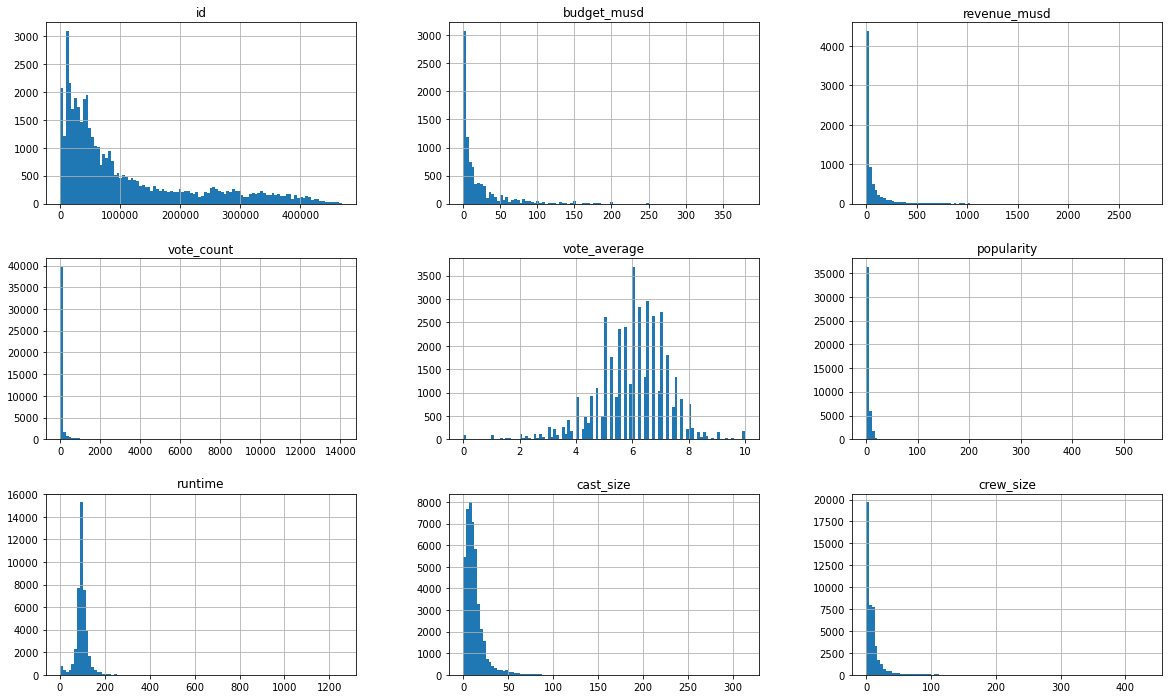

In [7]:
df.hist(figsize=(20,12), bins=100)
plt.show()

In [8]:
df['budget_musd'].value_counts(dropna = False).head(20)

NaN      35837
5.00       286
10.00      258
20.00      243
2.00       241
15.00      226
3.00       220
25.00      206
1.00       195
30.00      189
4.00       180
6.00       173
12.00      171
40.00      166
8.00       155
0.50       141
35.00      141
7.00       137
50.00      124
1.50       119
Name: budget_musd, dtype: int64

In [9]:
df['revenue_musd'].value_counts(dropna=False).head(20)

NaN      37306
12.00       20
11.00       19
10.00       19
2.00        18
6.00        17
5.00        14
8.00        13
0.50        13
0.00        12
14.00       12
7.00        11
20.00       10
1.00        10
3.00        10
1.50         9
4.00         9
0.00         9
16.00        8
15.00        8
Name: revenue_musd, dtype: int64

In [10]:
df['vote_average'].value_counts(dropna=False).head(20)

NaN     2614
6.00    2421
5.00    1969
7.00    1859
6.50    1705
6.30    1583
5.50    1369
5.80    1358
6.40    1343
6.70    1328
6.80    1316
6.10    1274
6.60    1250
6.20    1240
5.90    1189
5.30    1068
5.70    1039
6.90    1029
5.60     994
7.30     987
Name: vote_average, dtype: int64

In [11]:
df['vote_count'].value_counts(dropna=False).head(20)

1.00     3186
2.00     3056
3.00     2729
0.00     2614
4.00     2442
5.00     2066
6.00     1724
7.00     1553
8.00     1333
9.00     1179
10.00    1156
11.00     933
12.00     850
13.00     725
14.00     697
15.00     671
16.00     599
17.00     551
18.00     496
20.00     459
Name: vote_count, dtype: int64

In [12]:
df.describe(include="object")

,title,tagline,release_date,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,44657,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,17225,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,2008-01-01,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,133,4935,29,31755,741,17723,3,22189,3,24,66


In [13]:
df[df['title'] == 'Cinderella']

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.90,263.59,RKO Radio Pictures|Walt Disney Productions,United States of America,1760.00,6.80,14.44,74.00,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,United States of America,28.00,6.10,2.10,88.00,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,United States of America,7.00,5.40,0.36,52.00,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,Japan|United States of America,2.00,6.00,2.15,48.00,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,Italy,9.00,5.30,0.99,180.00,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.00,543.51,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,United Kingdom|United States of America,2426.00,6.70,19.80,105.00,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,Russia,5.00,4.80,0.49,80.00,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,United States of America,5.00,5.90,0.21,77.00,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,NaN,5.00,5.60,1.09,90.00,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,France,19.00,5.50,1.30,5.00,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


In [14]:
from IPython.display import HTML # imports data from internet in high quality format

In [15]:
df_best = df[['poster_path', 'title', 'budget_musd', 'revenue_musd', 
             'vote_count', 'vote_average', 'popularity']].copy()

In [16]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poster_path   44467 non-null  object 
 1   title         44691 non-null  object 
 2   budget_musd   8854 non-null   float64
 3   revenue_musd  7385 non-null   float64
 4   vote_count    44691 non-null  float64
 5   vote_average  42077 non-null  float64
 6   popularity    44691 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [17]:
df_best['profit_musd'] = df['revenue_musd'].sub(df['budget_musd']) # profit = revenue - budget
df_best['return'] = df['revenue_musd'].div(df['budget_musd']) # ROI = revenue / budget

In [18]:
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,NaN,NaN,1.00,4.00,0.07,NaN,NaN
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.00,9.00,0.18,NaN,NaN
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,NaN,NaN,6.00,3.80,0.90,NaN,NaN
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.00,NaN,0.00,NaN,NaN


In [19]:
df_best.columns = ["", "Title", "Budget", 'Revenue', "Votes", "Average Rating", "Populariity", "Profit", "ROI"]

In [20]:
df_best.set_index('Title', inplace=True)

In [21]:
df_best

,,Budget,Revenue,Votes,Average Rating,Populariity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.00,6.50,11.71,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.58,173.00,5.70,8.39,NaN,NaN
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.00,4.00,0.07,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.00,9.00,0.18,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.00,3.80,0.90,NaN,NaN


In [22]:
df_best.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

# make the images from the website appear for us on jupyter

In [23]:
subset = df_best.iloc[:5, :2]

In [24]:
subset

,,Budget
Title,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.00
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.00
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.00
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN


In [25]:
HTML(subset.to_html(escape=False))

,,Budget
Title,,
Toy Story,,30.00
Jumanji,,65.00
Grumpier Old Men,,NaN
Waiting to Exhale,,16.00
Father of the Bride Part II,,NaN


__Define__ an appropriate __user-defined function__ to reuse code.

In [26]:
df_best.sort_values(by = "Average Rating", ascending=False)

,,Budget,Revenue,Votes,Average Rating,Populariity,Profit,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,NaN,NaN,1.00,10.00,0.04,NaN,NaN
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2...,NaN,NaN,1.00,10.00,0.32,NaN,NaN
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifP...,NaN,NaN,1.00,10.00,0.04,NaN,NaN
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOc...,NaN,NaN,1.00,10.00,1.78,NaN,NaN
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH...,NaN,NaN,2.00,10.00,0.48,NaN,NaN
...,...,...,...,...,...,...,...,...
Altar of Fire,<img src='http://image.tmdb.org/t/p/w185//iJ78...,NaN,NaN,0.00,NaN,0.00,NaN,NaN
The Wonders of Aladdin,<img src='http://image.tmdb.org/t/p/w185//AvfX...,NaN,NaN,0.00,NaN,0.09,NaN,NaN
Deep Hearts,<img src='http://image.tmdb.org/t/p/w185//8jI4...,NaN,NaN,0.00,NaN,0.01,NaN,NaN


In [27]:
df_best.sort_values("ROI", ascending=False)

,,Budget,Revenue,Votes,Average Rating,Populariity,Profit,ROI
Title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.00,12.40,77.00,6.10,4.03,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.00,8.50,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.00,33.58,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.00,2.76,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.00,115.10,457.00,5.90,9.23,115.10,1018619.28
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.00,4.00,0.07,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.00,9.00,0.18,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.00,3.80,0.90,NaN,NaN


In [28]:
df_best.loc[df_best['Budget'] >= 5].sort_values(by = 'ROI', ascending = False)

,,Budget,Revenue,Votes,Average Rating,Populariity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,5.00,368.74,686.00,6.20,6.72,363.74,73.75
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.00,470.65,2628.00,7.50,19.73,463.65,67.24
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,5.00,328.20,512.00,6.30,7.79,323.20,65.64
...,...,...,...,...,...,...,...,...
The Blonde with Bare Breasts,<img src='http://image.tmdb.org/t/p/w185//zBjp...,7.50,NaN,3.00,4.00,0.88,NaN,NaN
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APL...,34.00,NaN,67.00,7.30,9.80,NaN,NaN
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVB...,5.40,NaN,153.00,5.30,5.61,NaN,NaN


In [29]:
df_best['Budget'].fillna(0, inplace=True)
df_best['Votes'].fillna(0, inplace=True)

In [30]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average Rating  42077 non-null  float64
 5   Populariity     44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


# Function

In [31]:
def best_worst(num_movies, column, ascending = False, min_bud = 0, min_votes = 0):
    
    df2 = df_best.loc[(df_best['Budget'] >= min_bud) & (df_best['Votes'] >= min_votes),
                     ["", column]].sort_values(by = column, ascending = ascending).head(num_movies).copy()
    
    return HTML(df2.to_html(escape=False))

__Movies Top 5 - Highest Revenue__

In [32]:
best_worst(num_movies = 5, column = 'Revenue')

,,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


__Movies Top 5 - Highest Budget__

In [33]:
best_worst(num_movies=5, column='Budget')

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Transformers: The Last Knight,,260.00


__Movies Top 5 - Highest Profit__

In [34]:
best_worst(num_movies=5, column="Profit")

,,Profit
Title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


__Movies Top 5 - Lowest Profit__

In [35]:
best_worst(num_movies=5, column='Profit', ascending=True)

,,Profit
Title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


__Movies Top 5 - Highest ROI__

In [36]:
best_worst(num_movies=5, column='ROI', min_bud=5)


,,ROI
Title,,
E.T. the Extra-Terrestrial,,75.52
My Big Fat Greek Wedding,,73.75
Star Wars,,70.49
Jaws,,67.24
Crocodile Dundee,,65.64


__Movies Top 5 - Lowest ROI__

In [37]:
best_worst(num_movies=5, column='ROI', ascending=True, min_bud=100)

,,ROI
Title,,
The Adventures of Pluto Nash,,0.07
The Alamo,,0.18
Live by Night,,0.21
Mars Needs Moms,,0.26
The Lone Ranger,,0.35


__Movies Top 5 - Most Votes__

In [38]:
best_worst(5, 'Votes')

,,Votes
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


__Movies Top 5 - Highest Rating__

In [39]:
best_worst(5, 'Average Rating', min_votes=50)

,,Average Rating
Title,,
Planet Earth II,,9.50
Dilwale Dulhania Le Jayenge,,9.10
Planet Earth,,8.80
Sansho the Bailiff,,8.70
The Jinx: The Life and Deaths of Robert Durst,,8.60


__Movies Top 5 - Lowest Rating__

In [40]:
best_worst(5, 'Average Rating', ascending=True, min_votes=10)

,,Average Rating
Title,,
Call Me by Your Name,,0.00
Extinction: Nature Has Evolved,,0.00
How to Talk to Girls at Parties,,0.00
Santa Claus,,1.60
The Beast of Yucca Flats,,1.60


__Movies Top 5 - Most Popular__

In [41]:
best_worst(5, 'Populariity')

,,Populariity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [42]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

In [69]:
ser4 = ((df['genres'].str.contains('Action')) | (df['genres'].str.contains('Thriller'))) & (df['original_language'].str.contains('en')) & (df['vote_average'] > 7.5)

In [71]:
test = df.loc[ser4, ["title",'poster_path','genres', 'vote_average', 'release_date']].sort_values(by='release_date', ascending = False)

In [72]:
HTML(test.to_html(escape=False))

,title,poster_path,genres,vote_average,release_date
42624,The Book of Henry,,Thriller|Drama|Crime,7.60,2017-06-16
26273,Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.60,2017-04-19
43467,Revengeance,,Comedy|Action|Animation,8.00,2017-04-05
44431,First Round Down,,Action|Comedy,10.00,2017-03-04
41506,Logan,,Action|Drama|Science Fiction,7.60,2017-02-28
42877,Tomato Red,NaN,Drama|Thriller,8.00,2017-02-24
44447,Zero 3,,Thriller,8.70,2017-01-27
41622,The River Thief,,Crime|Action|Adventure,9.30,2016-10-14
40525,The Thinning,,Thriller,7.60,2016-10-12
42655,Only For One Night,,Thriller,8.00,2016-10-01


In [43]:
df['revenue_musd'].fillna(0,inplace=True)

In [44]:
ser3 = (df['production_companies'].str.contains("Pixar")) & (df['release_date'].between("2010-01-01", '2015-12-31'))

In [45]:
ser3o = df.loc[ser3, ['title', 'poster_path','revenue_musd', 'release_date']].sort_values(by='revenue_musd', ascending=False).set_index('title')

In [73]:
HTML(ser3o.to_html(escape=False))

,poster_path,revenue_musd,release_date
title,,,
Toy Story 3,,1066.97,2010-06-16
Inside Out,,857.61,2015-06-09
Monsters University,,743.56,2013-06-20
Cars 2,,559.85,2011-06-11
Brave,,538.98,2012-06-21
The Good Dinosaur,,331.93,2015-11-14
The Legend of Mor'du,,0.00,2012-01-01
Air Mater,,0.00,2011-08-04
Sanjay's Super Team,,0.00,2015-11-25


In [74]:
ser2 = df['cast'].str.contains('Uma Thurman', na=False) & (df['director'] == 'Quentin Tarantino')
ser2

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Length: 44691, dtype: bool

In [75]:
tarantine = df.loc[ser2, ['title', 'poster_path', 'runtime']].sort_values(by='runtime')

In [76]:
HTML(tarantine.to_html(escape=False))

,title,poster_path,runtime
6667,Kill Bill: Vol. 1,,111.00
7208,Kill Bill: Vol. 2,,136.00
291,Pulp Fiction,,154.00


In [78]:
mask_genre = (df['genres'].str.contains("Action", na=False)) &(df['genres'].str.contains('Science Fiction', na=False))


In [79]:
df['cast'][0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

In [80]:
mask_actor = df['cast'].str.contains('Bruce Willis', na=False)

In [81]:
bruce = df.loc[(mask_actor & mask_genre), ['title', 'poster_path',"vote_average"]].sort_values(by='vote_average', ascending=False)

In [82]:
HTML(bruce.to_html(escape=False))

,title,poster_path,vote_average
1448,The Fifth Element,,7.30
19218,Looper,,6.60
1786,Armageddon,,6.50
14135,Surrogates,,5.90
20333,G.I. Joe: Retaliation,,5.40
27619,Vice,,4.10


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

__Franchise vs. Stand-alone: Average Revenue__

In [84]:
df['belongs_to_collection']

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [87]:
df['franchise'] =df['belongs_to_collection'].notna()

In [88]:
df['franchise'].value_counts()

False    40228
True      4463
Name: franchise, dtype: int64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [90]:
df.groupby(['franchise'])['revenue_musd'].mean()

franchise
False    6.57
True    54.91
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [91]:
df['ROI'] = df['revenue_musd'].div(df['budget_musd'])

In [92]:
df.groupby(['franchise'])['ROI'].mean()

franchise
False   3974.64
True     661.52
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [93]:
df.groupby(['franchise'])['budget_musd'].mean()

franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [94]:
df.groupby(['franchise'])['popularity'].mean()

franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

In [95]:
df.groupby(['franchise'])['vote_average'].mean()

franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

In [97]:
df.groupby(['franchise']).agg({'revenue_musd':'mean', 'budget_musd':'mean', 'popularity':'mean', 'vote_average':'mean',
                              'ROI':'mean', 'vote_count':'mean'})

,revenue_musd,budget_musd,popularity,vote_average,ROI,vote_count
franchise,,,,,,
False,6.57,18.05,2.59,6.01,3974.64,78.29
True,54.91,38.32,6.25,5.96,661.52,412.39


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [99]:
df['belongs_to_collection'].value_counts()

The Bowery Boys                  29
Totò Collection                  27
James Bond Collection            26
Zatôichi: The Blind Swordsman    26
The Carry On Collection          25
                                 ..
The 1997 Trilogy                  1
Valami Amerika gyűjtemény         1
Bats Collection                   1
Il tassinaro                      1
Tainá                             1
Name: belongs_to_collection, Length: 1691, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           44691 non-null  float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [108]:
franchise = df.groupby(['belongs_to_collection']).agg({'title':'count', 'budget_musd':['sum', 'mean'],
                                                       'revenue_musd':['sum', 'mean'],
                                                      'vote_average':'mean', 'popularity':'mean', 'ROI':'median',
                                                      'vote_count':'mean'})

In [109]:
franchise

title budget_musd       revenue_musd  \
                                     count         sum  mean          sum   
belongs_to_collection                                                       
... Has Fallen Collection                2      130.00 65.00       366.78   
00 Schneider Filmreihe                   1        0.00   NaN         0.00   
08/15 Collection                         1        0.00   NaN         0.00   
100 Girls Collection                     2        0.00   NaN         0.00   
101 Dalmatians (Animated) Collection     2        4.00  4.00       215.88   
...                                    ...         ...   ...          ...   
Сказки Чуковского                        1        0.00   NaN         0.00   
Чебурашка и крокодил Гена                1        0.00   NaN         0.00   
Что Творят мужчины! (Коллекция)          2        2.00  2.00         0.00   
男はつらいよ シリーズ                              3        0.00   NaN         0.00   
식객 시리즈                                   2        0.00   NaN         0.00   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
... Has Fallen Collection            183.39         6.00      13.01   2.86   
00 Schneider Filmreihe                 0.00         6.50       1.93    NaN   
08/15 Collection                       0.00         5.90       0.63    NaN   
100 Girls Collection                   0.00         5.15       3.08    NaN   
101 Dalmatians (Animated) Collection 107.94         6.25      13.06  53.97   
...                                     ...          ...        ...    ...   
Сказки Чуковского                      0.00         3.00       0.73    NaN   
Чебурашка и крокодил Гена              0.00         6.70       0.88    NaN   
Что Творят мужчины! (Коллекция)        0.00         3.15       1.30   0.00   
男はつらいよ シリーズ                            0.00         7.00       0.04    NaN   
식객 시리즈                                 0.00         4.95       0.16    NaN   

                                     vote_count  
                                           mean  
belongs_to_collection                            
... Has Fallen Collection               2333.00  
00 Schneider Filmreihe                    16.00  
08/15 Collection                           4.00  
100 Girls Collection                      64.00  
101 Dalmatians (Animated) Collection     937.00  
...                                         ...  
Сказки Чуковского                          3.00  
Чебурашка и крокодил Гена                  7.00  
Что Творят мужчины! (Коллекция)            5.50  
男はつらいよ シリーズ                                0.67  
식객 시리즈                                     3.50  

[1691 rows x 9 columns]

In [110]:
franchise.nlargest(20, ('title', 'count'))

title budget_musd       revenue_musd  \
                                       count         sum  mean          sum   
belongs_to_collection                                                         
The Bowery Boys                           29        0.00   NaN         0.00   
Totò Collection                           27        0.00   NaN         0.00   
James Bond Collection                     26     1539.65 59.22      7106.97   
Zatôichi: The Blind Swordsman             26        0.00   NaN         0.00   
The Carry On Collection                   25        0.00   NaN         0.00   
Charlie Chan (Sidney Toler) Collection    21        0.00   NaN         0.00   
Pokémon Collection                        20      250.72 50.14       601.87   
Godzilla (Showa) Collection               16        2.81  0.56         0.00   
Charlie Chan (Warner Oland) Collection    15        0.00   NaN         0.00   
Dragon Ball Z (Movie) Collection          15        5.00  5.00       112.12   
Uuno Turhapuro                            15        0.00   NaN         0.00   
Monster High Collection                   14        0.50  0.50         0.00   
The Land Before Time Collection           14       12.30 12.30        84.46   
George Carlin Comedy Collection           13        0.00   NaN         0.00   
Sharpe Collection                         13        0.00   NaN         0.00   
Friday the 13th Collection                12       84.40  7.03       464.90   
Johan Falk GSI Collection                 12        0.00   NaN         0.00   
Sherlock Holmes (1939 series)             12        0.00   NaN         0.00   
The Amityville Horror Collection          12       21.02  5.25       213.35   
An American Girl Collection               10        6.80  6.80         0.00   

                                              vote_average popularity    ROI  \
                                         mean         mean       mean median   
belongs_to_collection                                                          
The Bowery Boys                          0.00         6.67       0.20    NaN   
Totò Collection                          0.00         6.84       1.05    NaN   
James Bond Collection                  273.35         6.34      13.45   6.13   
Zatôichi: The Blind Swordsman            0.00         6.40       1.10    NaN   
The Carry On Collection                  0.00         6.17       3.22    NaN   
Charlie Chan (Sidney Toler) Collection   0.00         6.61       0.63    NaN   
Pokémon Collection                      30.09         6.06       4.37   4.28   
Godzilla (Showa) Collection              0.00         5.98       3.42   0.00   
Charlie Chan (Warner Oland) Collection   0.00         6.66       0.66    NaN   
Dragon Ball Z (Movie) Collection         7.47         6.61       6.18  12.35   
Uuno Turhapuro                           0.00         5.53       0.17    NaN   
Monster High Collection                  0.00         6.49       3.59   0.00   
The Land Before Time Collection          6.03         6.16       4.91   6.87   
George Carlin Comedy Collection          0.00         7.47       1.30    NaN   
Sharpe Collection                        0.00         6.74       1.71    NaN   
Friday the 13th Collection              38.74         5.42       9.76   6.67   
Johan Falk GSI Collection                0.00         6.50       1.52    NaN   
Sherlock Holmes (1939 series)            0.00         6.92       2.88    NaN   
The Amityville Horror Collection        17.78         4.36       7.18   0.00   
An American Girl Collection              0.00         5.25       1.94   0.00   

                                       vote_count  
                                             mean  
belongs_to_collection                              
The Bowery Boys                              0.72  
Totò Collection                             18.04  
James Bond Collection                     1284.31  
Zatôichi: The Blind Swordsman               11.19  
The Carry On Col

In [111]:
franchise.nlargest(20, ('revenue_musd','sum'))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Star Wars Collection                    8      854.35 106.79      7434.49   
James Bond Collection                  26     1539.65  59.22      7106.97   
The Fast and the Furious Collection     8     1009.00 126.12      5125.10   
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   
Transformers Collection                 5      965.00 193.00      4366.10   
Despicable Me Collection                6      299.00  74.75      3691.07   
The Twilight Collection                 5      385.00  77.00      3342.11   
Ice Age Collection                      5      429.00  85.80      3216.71   
Jurassic Park Collection                4      379.00  94.75      3031.48   
Shrek Collection                        5      535.00 133.75      2955.81   
The Hunger Games Collection             4      490.00 122.50      2944.16   
The Hobbit Collection                   3      750.00 250.00      2935.52   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
X-Men Collection                        6      983.00 163.83      2808.83   
Avatar Collection                       1      237.00 237.00      2787.97   
Mission: Impossible Collection          5      650.00 130.00      2778.98   
Spider-Man Collection                   3      597.00 199.00      2496.35   
The Dark Knight Collection              3      585.00 195.00      2463.72   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
Harry Potter Collection              963.42         7.54      26.25   6.17   
Star Wars Collection                 929.31         7.37      23.41   8.24   
James Bond Collection                273.35         6.34      13.45   6.13   
The Fast and the Furious Collection  640.64         6.66      10.80   4.94   
Pirates of the Caribbean Collection  904.32         6.88      53.97   3.45   
Transformers Collection              873.22         6.14      14.43   5.20   
Despicable Me Collection             615.18         6.78     106.72  12.76   
The Twilight Collection              668.42         5.84      29.50  10.27   
Ice Age Collection                   643.34         6.38      16.08   8.26   
Jurassic Park Collection             757.87         6.50      10.77   7.03   
Shrek Collection                     591.16         6.46      12.97   5.56   
The Hunger Games Collection          736.04         6.88      54.77   6.27   
The Hobbit Collection                978.51         7.23      25.21   3.83   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
X-Men Collection                     468.14         6.82       9.71   3.02   
Avatar Collection                   2787.97         7.20     185.07  11.76   
Mission: Impossible Collection       555.80         6.60      16.51   4.55   
Spider-Man Collection                832.12         6.47      22.62   3.92   
The Dark Knight Collection           821.24         7.80      57.42   4.34   

                                    vote_count  
                                          mean  
belongs_to_collection                           
Harry Potter Collection                5983.25  
Star Wars Collection                   5430.38  
James Bond Collection                  1284.31  
The Fast and the Furious Collection    3197.00  
Pirates of the Caribbean Collection    5016.00  
Transformers Collection                3046.40  
Despicable Me Collection    

In [112]:
franchise.nlargest(20, ('budget_musd','sum'))

title budget_musd        revenue_musd  \
                                        count         sum   mean          sum   
belongs_to_collection                                                           
James Bond Collection                      26     1539.65  59.22      7106.97   
Harry Potter Collection                     8     1280.00 160.00      7707.37   
Pirates of the Caribbean Collection         5     1250.00 250.00      4521.58   
The Fast and the Furious Collection         8     1009.00 126.12      5125.10   
X-Men Collection                            6      983.00 163.83      2808.83   
Transformers Collection                     5      965.00 193.00      4366.10   
Star Wars Collection                        8      854.35 106.79      7434.49   
The Hobbit Collection                       3      750.00 250.00      2935.52   
The Terminator Collection                   5      661.40 132.28      1845.33   
Mission: Impossible Collection              5      650.00 130.00      2778.98   
Spider-Man Collection                       3      597.00 199.00      2496.35   
The Dark Knight Collection                  3      585.00 195.00      2463.72   
Captain America Collection                  3      560.00 186.67      2238.64   
The Chronicles of Narnia Collection         3      560.00 186.67      1584.14   
Iron Man Collection                         3      540.00 180.00      2424.55   
Shrek Collection                            5      535.00 133.75      2955.81   
Star Trek: Alternate Reality Collection     3      525.00 175.00      1196.52   
Madagascar Collection                       4      502.00 125.50      2257.05   
The Avengers Collection                     2      500.00 250.00      2924.96   
Cars Collection                             3      495.00 165.00      1372.01   

                                                vote_average popularity  \
                                           mean         mean       mean   
belongs_to_collection                                                     
James Bond Collection                    273.35         6.34      13.45   
Harry Potter Collection                  963.42         7.54      26.25   
Pirates of the Caribbean Collection      904.32         6.88      53.97   
The Fast and the Furious Collection      640.64         6.66      10.80   
X-Men Collection                         468.14         6.82       9.71   
Transformers Collection                  873.22         6.14      14.43   
Star Wars Collection                     929.31         7.37      23.41   
The Hobbit Collection                    978.51         7.23      25.21   
The Terminator Collection                369.07         6.54      21.89   
Mission: Impossible Collection           555.80         6.60      16.51   
Spider-Man Collection                    832.12         6.47      22.62   
The Dark Knight Collection               821.24         7.80      57.42   
Captain America Collection               746.21         7.10      61.31   
The Chronicles of Narnia Collection      528.05         6.40      14.34   
Iron Man Collection                      808.18         6.93      21.63   
Shrek Collection                         591.16         6.46      12.97   
Star Trek: Alternate Reality Collection  398.84         7.13      17.27   
Madagascar Collection                    564.26         6.43      16.21   
The Avengers Collection                 1462.48         7.35      63.63   
Cars Collection                          457.34         6.33      17.25   

                                           ROI vote_count  
                                        median       mean  
belongs_to_collection                                      
James Bond Collection                     6.13    1284.31  
Harry Potter Collection                   6.17    5983.25  
Pirates of the Caribbean Collection       3.45    5016.00  
The Fast and the Furious Collection       4.94    3197.00  
X-Men Collection              

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [113]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'franchise', 'ROI'],
      dtype='object')

In [116]:
df['director']

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [117]:
df['director'].value_counts()

John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Woody Allen           49
                      ..
Dave Allen             1
Bela Negi              1
George Schnéevoigt     1
Ray McKinnon           1
T. Hayes Hunter        1
Name: director, Length: 17349, dtype: int64

In [ ]:
franchise = df.groupby(['belongs_to_collection']).agg({'title':'count', 'budget_musd':['sum', 'mean'],
                                                       'revenue_musd':['sum', 'mean'],
                                                      'vote_average':'mean', 'popularity':'mean', 'ROI':'median',
                                                      'vote_count':'mean'})

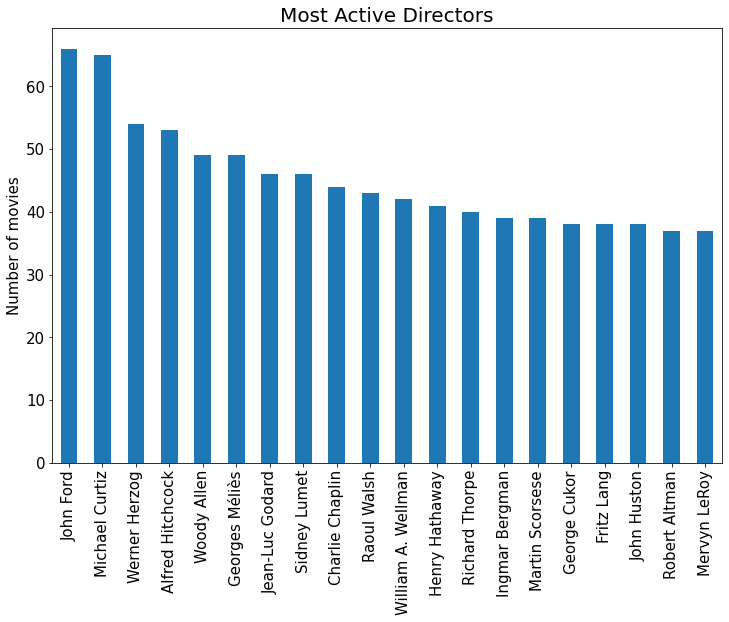

In [119]:
plt.figure(figsize=(12,8))
df['director'].value_counts().head(20).plot(kind='bar', fontsize=15)
plt.title('Most Active Directors', fontsize=20)
plt.ylabel("Number of movies", fontsize=15)
plt.show()

In [128]:
df.groupby(['director'])['revenue_musd'].sum().nlargest(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

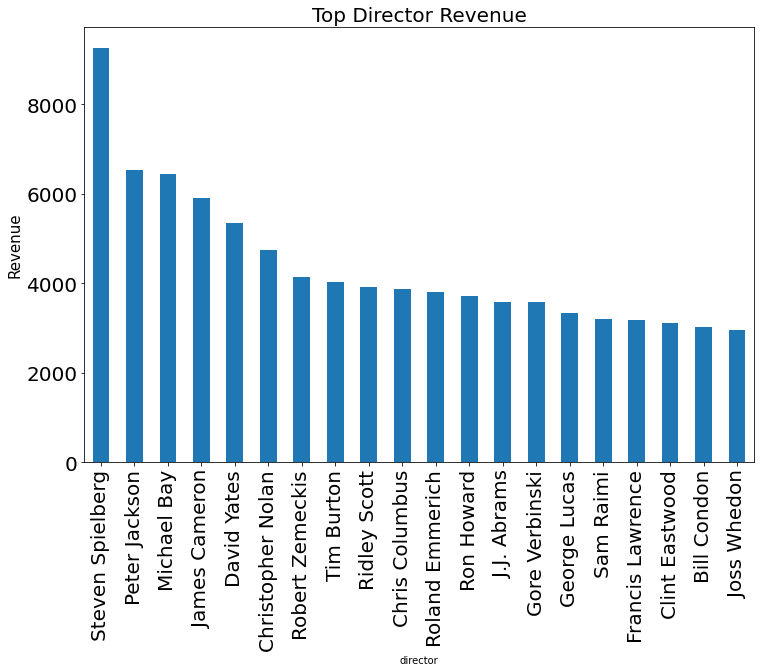

In [125]:
plt.figure(figsize=(12,8))
df.groupby(['director'])['revenue_musd'].sum().nlargest(20).plot(kind='bar', fontsize=20)
plt.title('Top Director Revenue', fontsize=20)
plt.ylabel('Revenue', fontsize=15)
plt.show()

In [123]:
df.groupby(['director'])['vote_average'].mean().nlargest(20)

director
A.W. Vidmer            10.00
Amy Schatz             10.00
Ana Poliak             10.00
Andrew Bowser          10.00
Andrew Napier          10.00
Antonis Sotiropoulos   10.00
Barry Bruce            10.00
Brandon Chesbro        10.00
Brett M. Butler        10.00
Brian Skeet            10.00
Bruno Irizarry         10.00
Christine Edzard       10.00
Christopher Fraser     10.00
Cody Blue Snider       10.00
Colin Webb             10.00
Dan Hartley            10.00
David Langlitz         10.00
Deborah Koons          10.00
Dick Bartlett          10.00
Don Askarian           10.00
Name: vote_average, dtype: float64

In [138]:
directors = df.groupby(['director']).agg({'title':'count', 'vote_average':'mean',
                                          'popularity':'mean', 'vote_count':'sum'})

In [139]:
directors

,title,vote_average,popularity,vote_count
director,,,,
Dale Trevillion\t,2,4.00,0.04,4.00
Davide Manuli,1,6.90,1.03,10.00
E.W. Swackhamer,1,5.90,0.01,5.00
Vitaliy Vorobyov,1,5.50,0.48,3.00
Yeon Sang-Ho,4,6.60,6.84,1039.00
...,...,...,...,...
Ярополк Лапшин,1,10.00,0.00,1.00
پیمان معادی,1,6.00,0.18,2.00
塩谷 直義,1,7.20,4.30,40.00


In [141]:
directors[(directors['vote_count'] >= 10000) & (directors['title']> 10)].nlargest(20, 'vote_average')

,title,vote_average,popularity,vote_count
director,,,,
Hayao Miyazaki,14,7.70,11.55,14700.00
Christopher Nolan,11,7.62,28.85,67344.00
Martin Scorsese,39,7.22,7.26,35541.00
Peter Jackson,13,7.14,18.84,47571.00
Joel Coen,17,7.02,11.22,18139.00
James Cameron,11,6.93,28.07,33736.00
Stanley Kubrick,16,6.91,10.29,18214.00
Steven Spielberg,33,6.89,13.02,62266.00
Danny Boyle,14,6.87,11.44,16504.00


In [146]:
df['genres'] = df['genres'].astype(str)

In [149]:
df.loc[df['genres'].str.contains("Horror")].groupby(['director'])['revenue_musd'].sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64